<a href="https://colab.research.google.com/github/acg12/Scholarship-Bootcamp/blob/main/CASE_WEEK_1/ML/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Cleaning & Visual EDA

In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('Mall_Customers.csv')
df = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [83]:
df.isnull().any()

Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [84]:
df.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [85]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Dari scatter plot di bawah ini, kita bisa melihat bahwa semakin kecil Age nya customer, spending score nya semakin kecil, tidak ada yang memiliki spending score di atas 60, untuk customer berumur 40 - 70.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


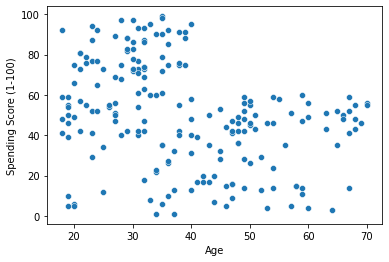

In [87]:
sns.scatterplot(
    df['Age'],
    df['Spending Score (1-100)']
)
plt.show()

Dari berbagai plot dibawah ini, bisa melihat:
- Di umur 20 - 60 an ada lebih banyak "Female" yang belanja di mall
- Annual Income untuk "Female" juga rata-rata lebih besar daripada "Male"
- Spending Score untuk "Female" juga rata-rata lebih besar daripada "Male" 

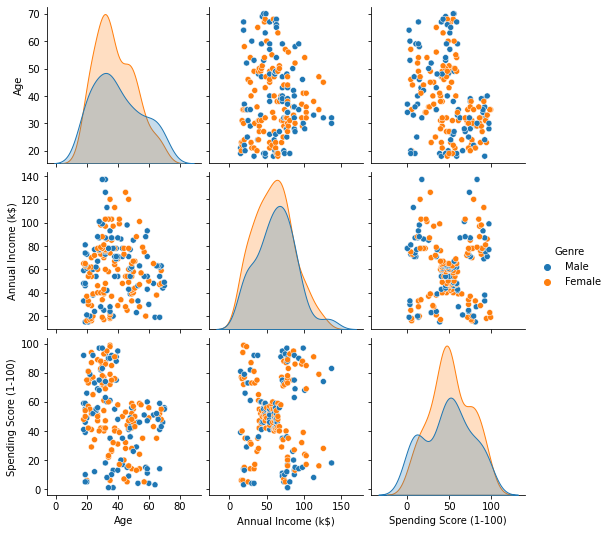

In [88]:
sns.pairplot(data=df, hue='Genre')

# 2. Training Set & Test Set

In [89]:
X = df.drop(['Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train)
print(y_train)

      Genre  Age  Annual Income (k$)
114  Female   18                  65
173    Male   36                  87
5    Female   22                  17
126    Male   43                  71
117  Female   49                  65
..      ...  ...                 ...
106  Female   66                  63
14     Male   37                  20
92     Male   48                  60
179    Male   35                  93
102    Male   67                  62

[150 rows x 3 columns]
114    48
173    92
5      76
126    35
117    59
       ..
106    50
14     13
92     49
179    90
102    59
Name: Spending Score (1-100), Length: 150, dtype: int64


In [90]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

genre_train = pd.DataFrame(oh_encoder.fit_transform(X_train[['Genre']]))
genre_test = pd.DataFrame(oh_encoder.transform(X_test[['Genre']]))

genre_train.index = X_train['Genre'].index
genre_test.index = X_test['Genre'].index

dropped_train = X_train.drop(['Genre'], axis=1)
dropped_test = X_test.drop(['Genre'], axis=1)

new_X_train = pd.concat([dropped_train, genre_train], axis=1)
new_X_test = pd.concat([dropped_test, genre_test], axis=1)

new_X_train

,Age,Annual Income (k$),0,1
114,18,65,1.0,0.0
173,36,87,0.0,1.0
5,22,17,1.0,0.0
126,43,71,0.0,1.0
117,49,65,1.0,0.0
...,...,...,...,...
106,66,63,1.0,0.0
14,37,20,0.0,1.0
92,48,60,0.0,1.0
179,35,93,0.0,1.0


# 3. Pemodelan

In [91]:
model = LinearRegression()
model.fit(new_X_train, y_train)
predictions = model.predict(new_X_test)

In [92]:
print(y_test.head())
print(pd.DataFrame(predictions).head())

95     52
15     79
30      4
158     1
128    11
Name: Spending Score (1-100), dtype: int64
           0
0  59.065345
1  58.672264
2  38.096431
3  54.225316
4  40.180833


# 4. Evaluasi Model

In [93]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('MAE:', mean_absolute_error(y_test, predictions))
print('Cross Validation: ', cross_val_score(model, new_X_test, y_test, cv=5, scoring='neg_mean_absolute_error') * -1)

RMSE: 22.455007929488023
MAE: 18.81875985008609
Cross Validation:  [22.92783126 14.26571213 27.10649915 14.41271836 29.69210082]


In [94]:
print(model.coef_)

[-0.55130942  0.03739251  0.18572069 -0.18572069]


# 5. Plot Predicted Value vs Measure

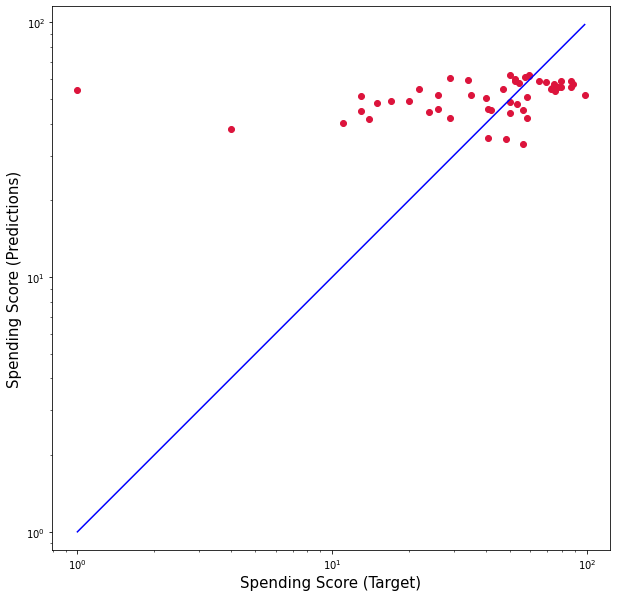

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Spending Score (Target)', fontsize=15)
plt.ylabel('Spending Score (Predictions)', fontsize=15)
plt.axis('equal')
plt.show()